## Lecture du fichier CSV et création d'un DataFrame

Cette cellule de code charge un fichier CSV contenant des données sur les tickets de voyage et crée un DataFrame pandas à partir de ces données.


In [2]:
import csv
import os
import pandas as pd 
# Get the directory where the script is located
current_directory = os.getcwd()

# Assuming your CSV file is named 'example.csv' and located in the same directory as the script
csv_file_name = 'ticket_data.csv'

# Join the script directory with the file name to get the full file path
csv_file_path = os.path.join(current_directory, csv_file_name)

# Read the CSV file into a DataFrame
df_td = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df_td)


            id  company  o_station  d_station            departure_ts  \
0      6795026        9       63.0     1044.0  2017-10-13 13:05:00+00   
1      6795076        9    10144.0      396.0  2017-10-06 10:05:00+00   
2      6795078        9    10144.0      396.0  2017-10-06 11:55:00+00   
3      6795079        9        3.0      396.0  2017-10-06 12:30:00+00   
4      6795081        9    10144.0      396.0  2017-10-06 17:40:00+00   
...        ...      ...        ...        ...                     ...   
74163  6835757     8387    11015.0    11005.0  2017-10-14 17:00:00+00   
74164  6844368     8387    11011.0    11010.0  2017-10-14 15:30:00+00   
74165  6844369     8387    11012.0    11010.0  2017-10-14 16:00:00+00   
74166  6844504     8387    11011.0    11010.0  2017-10-14 15:30:00+00   
74167  6844505     8387    11012.0    11010.0  2017-10-14 16:00:00+00   

                   arrival_ts  price_in_cents                   search_ts  \
0      2017-10-14 06:55:00+00            1450 

## Calcul et affichage des valeurs moyenne, maximale et minimale de la colonne 'price_in_cents'


In [3]:
# Display the mean, max, and min values of the 'price_in_cents' column
price_in_cents_column = df_td['price_in_cents']
mean_price = price_in_cents_column.mean()
max_price = price_in_cents_column.max()
min_price = price_in_cents_column.min()

print(f"Mean price: {mean_price}")
print(f"Max price: {max_price}")
print(f"Min price: {min_price}")

Mean price: 4382.711061374178
Max price: 38550
Min price: 300


## Conversion des horodatages de départ et d'arrivée en objets datetime et calcul des durées de trajet

Cette cellule de code convertit les horodatages de départ et d'arrivée en objets datetime et calcule ensuite les durées de trajet correspondantes en soustrayant les horodatages d'arrivée des horodatages de départ.


In [4]:
# Convert departure and arrival timestamps to datetime objects
df_td['departure_ts'] = pd.to_datetime(df_td['departure_ts'])
df_td['arrival_ts'] = pd.to_datetime(df_td['arrival_ts'])

# Calculate trip durations
df_td['trip_duration'] = df_td['arrival_ts'] - df_td['departure_ts']

# Calculate mean, max, and min trip durations
mean_duration = df_td['trip_duration'].mean()
max_duration = df_td['trip_duration'].max()
min_duration = df_td['trip_duration'].min()

print(f"Mean trip duration: {mean_duration}")
print(f"Max trip duration: {max_duration}")
print(f"Min trip duration: {min_duration}")

Mean trip duration: 0 days 07:04:37.247600043
Max trip duration: 20 days 12:51:00
Min trip duration: 0 days 00:20:00


## Calcul de la distance géographique avec la formule de Haversine

Cette cellule de code définit une fonction `haversine` qui calcule la distance en kilomètres entre deux points géographiques en utilisant la formule de Haversine.


In [5]:
import math 

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # Convert latitude and longitude from decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    radius_of_earth = 6371  # Radius of the earth in kilometers
    distance = radius_of_earth * c

    return distance

## Lecture du fichier CSV 'cities.csv' pour les données sur les villes

Ce code lit le fichier CSV 'cities.csv' contenant des informations sur les villes et crée un DataFrame pour ces données. Il permet d'obtenir un aperçu des caractéristiques des villes disponibles dans le jeu de données.


In [6]:
# Assuming your CSV file is named 'example.csv' and located in the same directory as the script
csv_file_name = 'cities.csv'

# Join the script directory with the file name to get the full file path
csv_file_path = os.path.join(current_directory, csv_file_name)

# Read the CSV file into a DataFrame
df_cities = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df_cities)

         id                                      local_name  \
0      5159                           Padua, Veneto, Italia   
1        76                     Barcelona, Cataluña, España   
2        81                     Basel, Basel-Stadt, Schweiz   
3       259                   Erlangen, Bayern, Deutschland   
4     11979                              Balș, Olt, România   
...     ...                                             ...   
8035   9964  Saint-André-lez-Lille, Hauts-de-France, France   
8036  10863             Kiev, Шевченківський район, Ukraine   
8037  11144                           Brighton, England, UK   
8038  11377           Manises, Comunitat Valenciana, España   
8039  11537               South Cambridgeshire, England, UK   

                unique_name   latitude  longitude  population  
0                     padua  45.406435  11.876761    209678.0  
1                 barcelona  41.385064   2.173404   1611822.0  
2                     basel  47.593437   7.619812  

## Calcul de la distance entre les villes pour chaque ligne du DataFrame

Cette fonction `calculate_distance` calcule la distance en kilomètres entre les villes de départ et d'arrivée pour chaque ligne du DataFrame `df_td`. Elle utilise les coordonnées géographiques (latitude et longitude) des villes obtenues à partir du DataFrame `df_cities`.

La distance calculée est ensuite ajoutée comme une nouvelle colonne appelée 'distance' dans le DataFrame `df_td`. Cela permet d'enrichir les données avec des informations sur la distance entre les villes pour chaque trajet.


In [7]:
# Function to calculate distance for each row
def calculate_distance(row):
    o_city_lat = df_cities.loc[df_cities['id'] == row['o_city'], 'latitude'].values[0]
    o_city_lon = df_cities.loc[df_cities['id'] == row['o_city'], 'longitude'].values[0]
    d_city_lat = df_cities.loc[df_cities['id'] == row['d_city'], 'latitude'].values[0]
    d_city_lon = df_cities.loc[df_cities['id'] == row['d_city'], 'longitude'].values[0]
    
    return haversine(o_city_lat, o_city_lon, d_city_lat, d_city_lon)

# Add distance column to df_trips
df_td['distance'] = df_td.apply(calculate_distance, axis=1)

print(df_td)

            id  company  o_station  d_station              departure_ts  \
0      6795026        9       63.0     1044.0 2017-10-13 13:05:00+00:00   
1      6795076        9    10144.0      396.0 2017-10-06 10:05:00+00:00   
2      6795078        9    10144.0      396.0 2017-10-06 11:55:00+00:00   
3      6795079        9        3.0      396.0 2017-10-06 12:30:00+00:00   
4      6795081        9    10144.0      396.0 2017-10-06 17:40:00+00:00   
...        ...      ...        ...        ...                       ...   
74163  6835757     8387    11015.0    11005.0 2017-10-14 17:00:00+00:00   
74164  6844368     8387    11011.0    11010.0 2017-10-14 15:30:00+00:00   
74165  6844369     8387    11012.0    11010.0 2017-10-14 16:00:00+00:00   
74166  6844504     8387    11011.0    11010.0 2017-10-14 15:30:00+00:00   
74167  6844505     8387    11012.0    11010.0 2017-10-14 16:00:00+00:00   

                     arrival_ts  price_in_cents                   search_ts  \
0     2017-10-14 06:

## Sauvegarde des données enrichies avec la distance entre les villes

Le DataFrame `df_td`, enrichi avec les distances calculées entre les villes de départ et d'arrivée pour chaque trajet, est sauvegardé dans un fichier CSV nommé 'td_with_distance.csv'. Cette étape permet de conserver les données traitées pour une analyse ultérieure.


In [8]:
csv_file_path = 'td_with_distance.csv'

# Save the DataFrame as a CSV file
df_td.to_csv(csv_file_path, index=False)

## Lecture du fichier CSV 'providers.csv' pour les données sur les fournisseurs


In [13]:
# Assuming your CSV file is named 'example.csv' and located in the same directory as the script
csv_file_name = 'providers.csv'

# Join the script directory with the file name to get the full file path
csv_file_path = os.path.join(current_directory, csv_file_name)

# Read the CSV file into a DataFrame
df_providers = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df_providers.columns)

Index(['id', 'company_id', 'provider_id', 'name', 'fullname', 'has_wifi',
       'has_plug', 'has_adjustable_seats', 'has_bicycle', 'transport_type'],
      dtype='object')


## Création d'une correspondance entre les identifiants des compagnies et les types de transport


In [14]:
# Create a dictionary mapping company IDs to lists of transport types (in case of duplicates)
company_transport_map = dict(zip(df_providers['id'], df_providers['transport_type']))
print(company_transport_map)


{9: 'bus', 10: 'bus', 11: 'bus', 12: 'bus', 13: 'bus', 14: 'car', 15: 'bus', 16: 'bus', 17: 'bus', 18: 'bus', 19: 'bus', 20: 'bus', 21: 'bus', 22: 'bus', 23: 'bus', 24: 'bus', 25: 'bus', 26: 'bus', 27: 'bus', 28: 'bus', 29: 'bus', 30: 'bus', 31: 'bus', 32: 'bus', 33: 'bus', 34: 'bus', 35: 'bus', 36: 'bus', 37: 'bus', 38: 'bus', 39: 'bus', 40: 'bus', 41: 'bus', 42: 'bus', 43: 'bus', 44: 'bus', 45: 'bus', 46: 'bus', 47: 'bus', 48: 'bus', 49: 'bus', 50: 'bus', 51: 'bus', 52: 'bus', 53: 'bus', 54: 'bus', 55: 'bus', 56: 'bus', 57: 'bus', 58: 'bus', 59: 'bus', 60: 'bus', 61: 'bus', 62: 'bus', 63: 'bus', 64: 'bus', 66: 'bus', 67: 'bus', 68: 'bus', 69: 'bus', 70: 'bus', 71: 'bus', 72: 'bus', 73: 'bus', 75: 'bus', 79: 'bus', 80: 'bus', 81: 'bus', 82: 'bus', 83: 'bus', 84: 'bus', 85: 'bus', 86: 'bus', 87: 'bus', 88: 'bus', 89: 'bus', 90: 'bus', 91: 'bus', 92: 'bus', 93: 'bus', 94: 'bus', 95: 'bus', 96: 'bus', 97: 'bus', 98: 'bus', 99: 'bus', 100: 'bus', 101: 'bus', 102: 'bus', 103: 'bus', 104: '

## Ajout de la colonne 'transport_type' au DataFrame des trajets

Dans cette étape, on ajoute une nouvelle colonne 'transport_type' au DataFrame des trajets (`df_td`) en se basant sur la correspondance entre les identifiants de compagnies et les types de transport définie précédemment. On utilise la méthode `map()` pour appliquer cette correspondance aux valeurs de la colonne 'company'. Ensuite, le DataFrame est sauvegardé dans un fichier CSV nommé 'td_with_distance_type.csv' sans inclure les index des lignes.


In [15]:
# Add 'transport_type' column to df_trips based on 'company' column
df_td['transport_type'] = df_td['company'].map(company_transport_map)

csv_file_path = 'td_with_distance_type.csv'

# Save the DataFrame as a CSV file
df_td.to_csv(csv_file_path, index=False)

## Catégorisation des distances et calcul des prix et durées moyennes par type de transport et tranche de distance

Dans cette étape, on définit des plages de distances et une fonction pour catégoriser les distances en fonction de ces plages. Ensuite, on applique cette fonction pour créer une nouvelle colonne 'distance_range' dans le DataFrame des trajets (`df_td`). On regroupe ensuite les données par 'transport_type' et 'distance_range', et on calcule les prix moyens et les durées moyennes pour chaque groupe. Le résultat est affiché et sauvegardé dans un fichier CSV nommé 'price_duration_by_transport_and_distance.csv'.


In [ ]:
# Define distance ranges
distance_ranges = {
    '0-200km': (0, 200),
    '201-800km': (201, 800),
    '801-2000km': (801, 2000),
    '2001+km': (2001, float('inf'))
}

# Create a function to categorize distance into ranges
def categorize_distance(distance):
    for range_name, (start, end) in distance_ranges.items():
        if start <= distance <= end:
            return range_name
    return None
    

    # Apply distance categorization to create a new column 'distance_range'
df_td['distance_range'] = df_td['distance'].apply(categorize_distance)


# Group by 'transport_type' and 'distance_range', calculate average price and duration
result = df_td.groupby(['transport_type', 'distance_range']).agg(
    avg_price=('price_in_cents', 'mean'),
    avg_duration=('trip_duration', 'mean')
).reset_index()

# Print or further process the result
print(result)

result.to_csv('price_duration_by_transport_and_distance.csv', index=False)

prédiction de prix
Dans ce code :

    Nous chargeons les données et sélectionnons les caractéristiques (distance et durée du trajet) ainsi que la variable cible (prix en cents).
    Divisons les données en ensembles d'entraînement et de test.
    Initialisons et entraînons un modèle de régression linéaire.
    Faisons des prédictions sur l'ensemble de test.
    Évaluons le modèle en utilisant l'erreur quadratique moyenne (MSE).

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the CSV file into a DataFrame
csv_file_path = 'td_with_distance_type.csv'
df_td = pd.read_csv(csv_file_path)

# Convert trip duration to minutes
df_td['trip_duration_minutes'] = df_td['trip_duration'] / pd.Timedelta(minutes=1)

# Features (X) and target variable (y)
X = df_td[['distance', 'trip_duration_minutes']]
y = df_td['price_in_cents']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 9945205.607345266


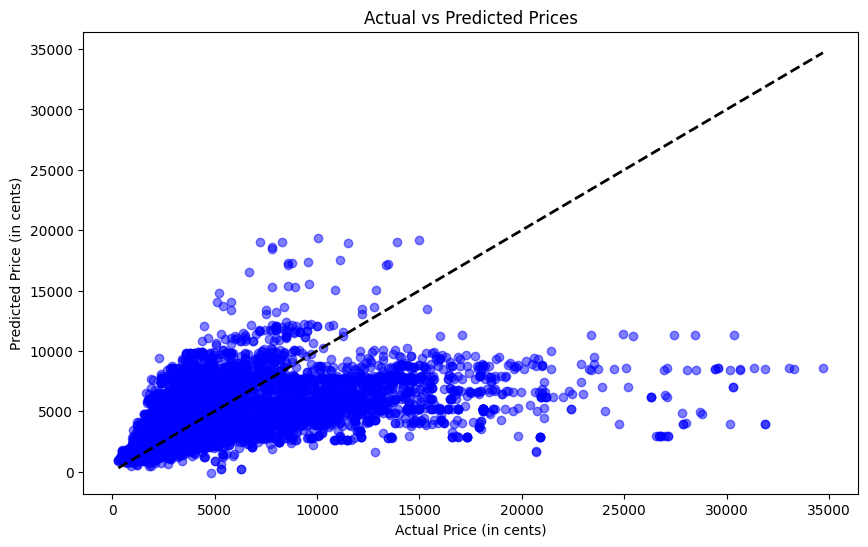

In [16]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price (in cents)')
plt.ylabel('Predicted Price (in cents)')
plt.title('Actual vs Predicted Prices')
plt.show()

On remarque que la régression linéaire est loin d'étre adequante avec note données.

## Création et évaluation du modèle de régression à forêts aléatoires

Dans cette étape, on crée un modèle de régression à forêts aléatoires en utilisant `RandomForestRegressor` à partir de scikit-learn. On spécifie le nombre d'estimateurs (arbres) à utiliser dans la forêt et on fixe la graine aléatoire pour assurer la reproductibilité des résultats. Ensuite, on entraîne le modèle sur les données d'entraînement et on effectue des prédictions sur les données de test. Enfin, on évalue la performance du modèle en calculant l'erreur quadratique moyenne (MSE) entre les valeurs réelles et prédites.


In [9]:
from sklearn.ensemble import RandomForestRegressor

# Create Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
predictions_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, predictions_rf)
print('Mean Squared Error (Random Forest):', mse_rf)


Mean Squared Error (Random Forest): 2260334.917482201


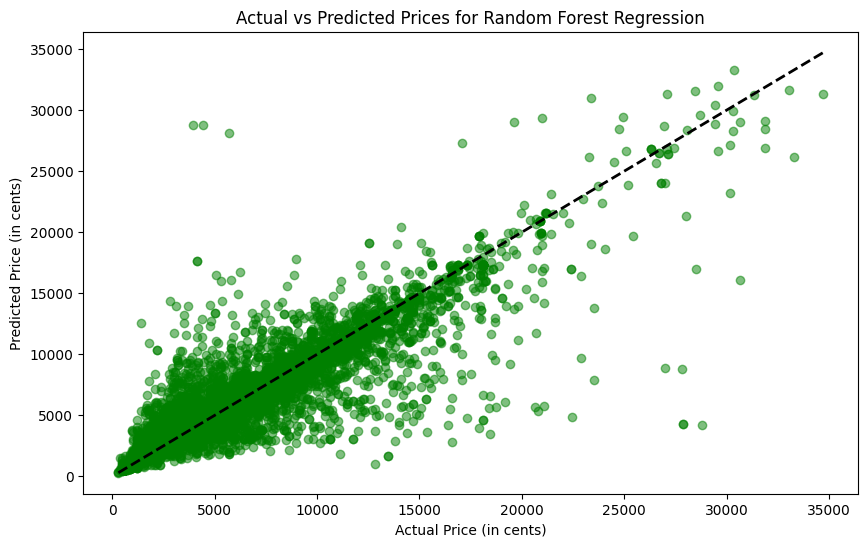

In [17]:
# Plot actual vs predicted prices for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_rf, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price (in cents)')
plt.ylabel('Predicted Price (in cents)')
plt.title('Actual vs Predicted Prices for Random Forest Regression')
plt.show()


## Interface de prédiction des prix

Dans cette partie, une interface de prédiction des prix a été créée à l'aide de widgets IPython. Voici ce que chaque élément de l'interface fait :

- **Champ de saisie de distance :** Un champ de texte permet à l'utilisateur de saisir la distance du trajet en kilomètres.
- **Menu déroulant du type de transport :** Un menu déroulant permet à l'utilisateur de sélectionner le type de transport parmi les options disponibles (train, bus, covoiturage).
- **Bouton de prédiction :** Un bouton permet à l'utilisateur de déclencher la prédiction du prix en fonction de la distance et du type de transport sélectionnés.

Lorsque l'utilisateur clique sur le bouton "Prédire", la fonction de prédiction est appelée, utilisant le modèle de forêt aléatoire entraîné, et le prix prédit est affiché.


In [14]:
import ipywidgets as widgets

# Create input widgets for distance and transport type
distance_input = widgets.FloatText(description='Distance (km):')
transport_type_input = widgets.Dropdown(
    options=['train', 'bus', 'carpool'],
    value='train',
    description='Transport Type:'
)

# Create a button widget for prediction
predict_button = widgets.Button(description='Predict')

# Function to handle prediction
def predict_price(button_click):
    distance = distance_input.value
    transport_type = transport_type_input.value
    
    # Convert transport type to numerical value
    transport_type_encoded = 0
    if transport_type == 'bus':
        transport_type_encoded = 1
    elif transport_type == 'carpool':
        transport_type_encoded = 2
    
    # Make prediction using the trained Random Forest model
    predicted_price = rf_model.predict([[distance, transport_type_encoded]])
    print(f'Predicted Price: {predicted_price[0]} cents')

# Attach predict_price function to button click event
predict_button.on_click(predict_price)

# Display widgets
widgets.VBox([distance_input, transport_type_input, predict_button])


Predicted Price: 699.15 cents


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predicted Price: 1096.3333333333335 cents


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Création d'une application Dash pour la visualisation interactive des données

Dans cette partie, on utilise la bibliothèque Dash pour créer une application web interactive permettant d'explorer les données sur les trajets. Voici ce que fait chaque partie du code :

- **Chargement des données :** Le fichier CSV 'td_with_distance_type.csv' est chargé dans un DataFrame pandas.
- **Initialisation de l'application Dash :** Une application Dash est initialisée.
- **Définition de la mise en page de l'application :** La mise en page de l'application est définie avec un graphique de dispersion et un menu déroulant pour sélectionner le type de transport.
- **Définition d'un rappel pour mettre à jour le graphique en fonction de la sélection du menu déroulant :** Un rappel est défini pour mettre à jour le graphique en fonction du type de transport sélectionné dans le menu déroulant.
- **Exécution de l'application :** L'application est exécutée en mode débogage.

Cette application permet aux utilisateurs d'explorer visuellement les relations entre le prix, la distance et la durée des trajets pour différents types de transport.


In [ ]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px

# Load the CSV file into a DataFrame
csv_file_path = 'td_with_distance_type.csv'
df_td = pd.read_csv(csv_file_path)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    dcc.Graph(id='scatter-plot'),
    html.Div([
        html.Label('Select Transport Type:'),
        dcc.Dropdown(
            id='transport-dropdown',
            options=[{'label': i, 'value': i} for i in df_td['transport_type'].unique()],
            value=df_td['transport_type'].unique()[0]
        )
    ])
])

# Define callback to update the scatter plot based on dropdown selection
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('transport-dropdown', 'value')]
)
def update_scatter_plot(selected_transport):
    filtered_data = df_td[df_td['transport_type'] == selected_transport]
    fig = px.scatter(filtered_data, x='distance', y='price_in_cents', color='transport_type',
                     hover_data=['trip_duration'],
                     title=f'Price vs Distance for {selected_transport}')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


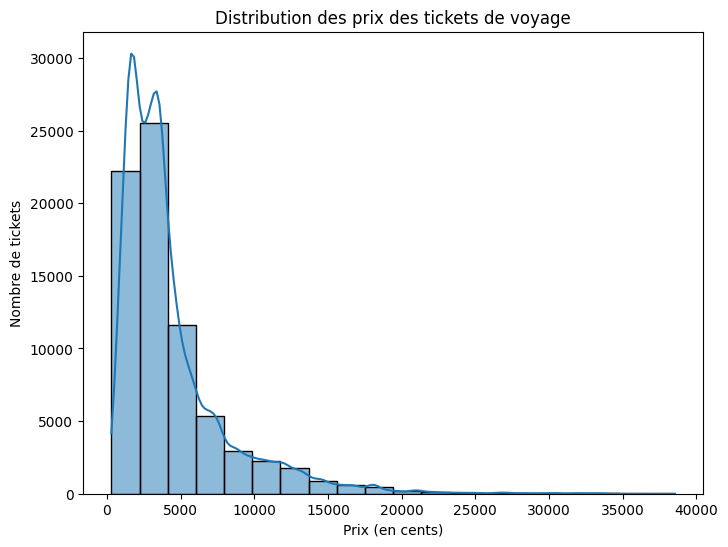

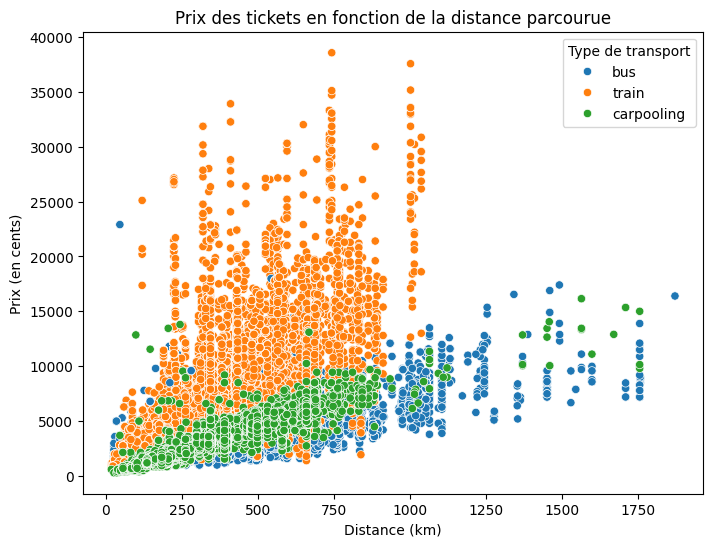

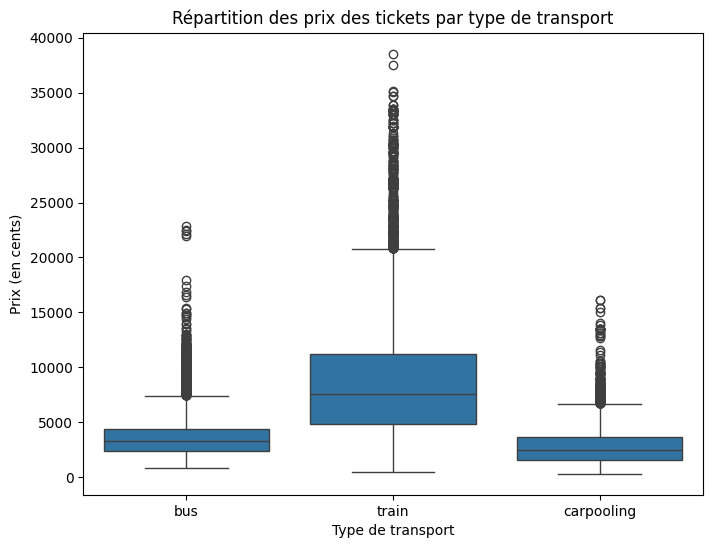

In [24]:

import seaborn as sns
import numpy as np 
import folium

# Charger les données des tickets de voyage
df_tickets = pd.read_csv('td_with_distance_type.csv')

# Graphique 1 : Histogramme des prix des tickets
plt.figure(figsize=(8, 6))
sns.histplot(df_tickets['price_in_cents'], bins=20, kde=True)
plt.title('Distribution des prix des tickets de voyage')
plt.xlabel('Prix (en cents)')
plt.ylabel('Nombre de tickets')
plt.show()

# Graphique 2 : Nuage de points : Prix par distance
plt.figure(figsize=(8, 6))
sns.scatterplot(x='distance', y='price_in_cents', data=df_tickets, hue='transport_type')
plt.title('Prix des tickets en fonction de la distance parcourue')
plt.xlabel('Distance (km)')
plt.ylabel('Prix (en cents)')
plt.legend(title='Type de transport')
plt.show()

# Graphique 3 : Boîte à moustaches des prix par type de transport
plt.figure(figsize=(8, 6))
sns.boxplot(x='transport_type', y='price_in_cents', data=df_tickets)
plt.title('Répartition des prix des tickets par type de transport')
plt.xlabel('Type de transport')
plt.ylabel('Prix (en cents)')
plt.show()

# Convertir la colonne 'trip_duration' en minutes
df_tickets['trip_duration_minutes'] = df_tickets['trip_duration'] / pd.Timedelta(minutes=1)

# Graphique 4 : Diagramme à barres : Durée moyenne du voyage par type de transport
plt.figure(figsize=(8, 6))
sns.barplot(x='transport_type', y='trip_duration_minutes', data=df_tickets, estimator=np.mean)
plt.title('Durée moyenne du voyage par type de transport')
plt.xlabel('Type de transport')
plt.ylabel('Durée moyenne du voyage (minutes)')
plt.show()


# Load the stations data into a DataFrame
df_stations = pd.read_csv('stations.csv')

# Merge df_tickets with df_stations to get the latitude and longitude of departure and arrival stations
df_tickets = df_tickets.merge(df_stations[['id', 'latitude', 'longitude', 'unique_name']], 
                               left_on='o_station', right_on='id', 
                               suffixes=('_departure', '_arrival'))
df_tickets = df_tickets.merge(df_stations[['id', 'latitude', 'longitude', 'unique_name']], 
                               left_on='d_station', right_on='id', 
                               suffixes=('_departure', '_arrival'))

# Plot the locations of departure and arrival stations


# Create a map centered around the mean latitude and longitude of stations
map_stations = folium.Map(location=[df_stations['latitude'].mean(), df_stations['longitude'].mean()], zoom_start=5)

# Add departure stations to the map
for index, row in df_stations.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['unique_name']).add_to(map_stations)

# Add arrival stations to the map
for index, row in df_stations.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['unique_name']).add_to(map_stations)

# Display the map
map_stations


